##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Tensors

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/tensor"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/tensor.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/guide/tensor.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/tensor.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [2]:
import tensorflow as tf
import numpy as np

Tensors are multi-dimensional arrays with a uniform type (called a `dtype`).  You can see all supported `dtypes` at `tf.dtypes.DType`.

If you're familiar with [NumPy](https://numpy.org/devdocs/user/quickstart.html){:.external}, tensors are (kind of) like `np.arrays`.

<font color="red">All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.</font>


## Basics

First, create some basic tensors.

Here is a "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

In [5]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [6]:
rank_0_tensor = 7
print(rank_0_tensor)

7


In [9]:
xc1 = tf.constant(0)
xc2 = xc1

print(xc1)
print(xc2) 

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [10]:
xc2 = xc2 + 1
print(xc1)
print(xc2)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


A "vector" or "rank-1" tensor is like a list of values. A vector has one axis:

In [11]:
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


A "matrix" or "rank-2" tensor has two axes:

In [12]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


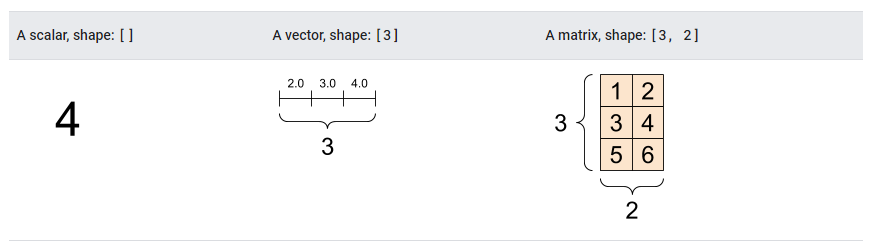

Tensors may have more axes; here is a tensor with three axes:

In [13]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],

  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
   
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


There are many ways you might visualize a tensor with more than two axes.

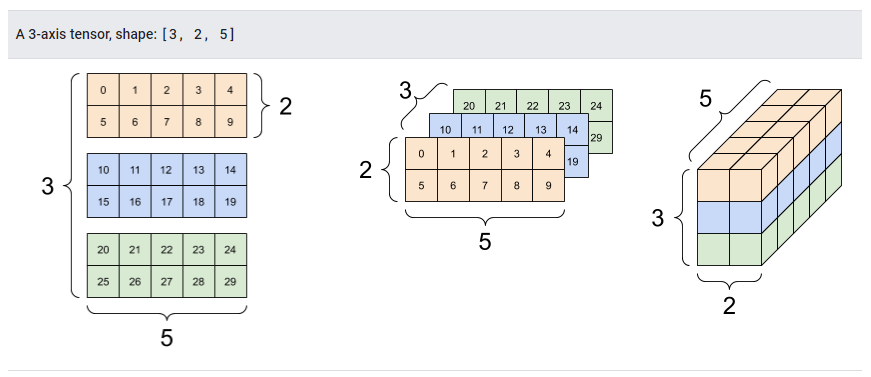

You can convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method:

In [14]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [15]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

Tensors often contain floats and ints, but have many other types, including:

* complex numbers
* strings

The base `tf.Tensor` class requires tensors to be "rectangular"---that is, along each axis, every element is the same size.  However, there are specialized types of tensors that can handle different shapes:

* Ragged tensors (see [RaggedTensor](#ragged_tensors) below)
* Sparse tensors (see [SparseTensor](#sparse_tensors) below)

You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [16]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [17]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



Tensors are used in all kinds of operations (or "Ops").

In [21]:
def softmax(a):
  c = np.max(a)
  print("c =" ,c)
  print("\n a-c = ", a-c )
  return np.exp(a-c) / np.sum(np.exp(a-c))

x = np.array([[4.0, 5.0], [10.0, 1.0]])
print(softmax(x))

c = 10.0

 a-c =  [[-6. -5.]
 [ 0. -9.]]
[[2.45581460e-03 6.67559620e-03]
 [9.90746321e-01 1.22267809e-04]]


In [22]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])
smv = tf.nn.softmax(c)
print(smv)
# print(c, "\n")

# # Find the largest value
# print(tf.reduce_max(c), "\n")

# # Find the index of the largest value
# print(tf.math.argmax(c), "\n")

# # Compute the softmax
# print(tf.nn.softmax(c))

tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


In [23]:
logits = tf.constant([[4.0, 5.0], [10.0, 1.0]])
softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits))
print(softmax)

tf.Tensor(
[[2.4558143e-03 6.6755959e-03]
 [9.9074626e-01 1.2226780e-04]], shape=(2, 2), dtype=float32)


###Exponential notation
* e+ </br>
  100,000 = 1.0 * 10<sup>5</sup> (1.0e+05)

* e- </br>
  0.1 = 1.0 * 10<sup>-1</sup> (1.0e-1)

* 4.24e+10 = 4.24 * 10<sup>10</sup>

* 4.24e-10 = 4.24 * 10<sup>-10</sup> (10<sup>-10</sup> = 1/10<sup>10</sup>)

Note: Typically, anywhere a TensorFlow function expects a `Tensor` as input, the function will also accept anything that can be converted to a `Tensor` using `tf.convert_to_tensor`. See below for an example.

In [24]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [25]:
tf.reduce_max([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
s121 = tf.reduce_max([1,2,3])
print(s121)

tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
tf.reduce_max(np.array([1,2,3]))

<tf.Tensor: shape=(), dtype=int64, numpy=3>

## About shapes

Tensors have shapes.  Some vocabulary:

* **Shape**: The length (number of elements) of each of the axes of a tensor.
* **Rank**: Number of tensor axes.  A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
* **Axis** or **Dimension**: A particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product of the shape vector's elements.


Note: Although you may see reference to a "tensor of two dimensions", a rank-2 tensor does not usually describe a 2D space.

Tensors and `tf.TensorShape` objects have convenient properties for accessing these:

In [26]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

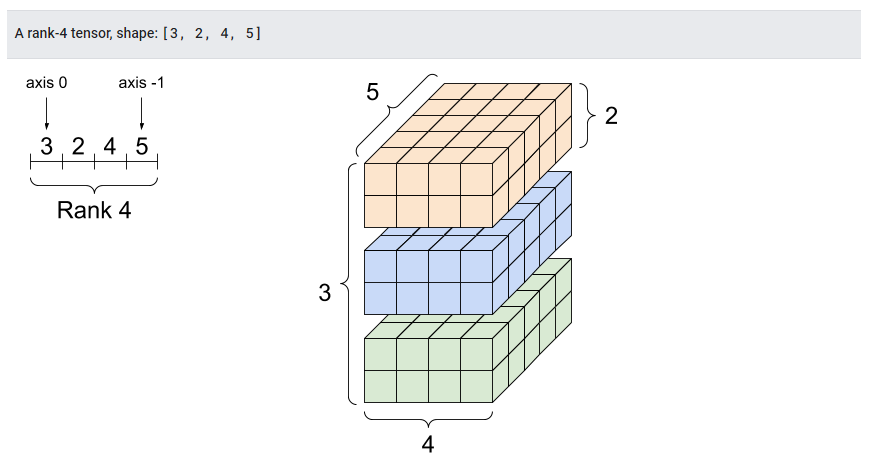

In [27]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


<font color="red">But note that the `Tensor.ndim` and `Tensor.shape` attributes don't return `Tensor` objects. If you need a `Tensor` use the `tf.rank` or `tf.shape` function. This difference is subtle, but it can be important when building graphs (later).</font>

In [ ]:
r4t = tf.rank(rank_4_tensor)
print(r4t)
print(type(r4t))

tf.Tensor(4, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
tf.shape(rank_4_tensor)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([3, 2, 4, 5], dtype=int32)>

While axes are often referred to by their indices, you should always keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.

<table>
<tr>
<th>Typical axis order</th>
</tr>
</table>

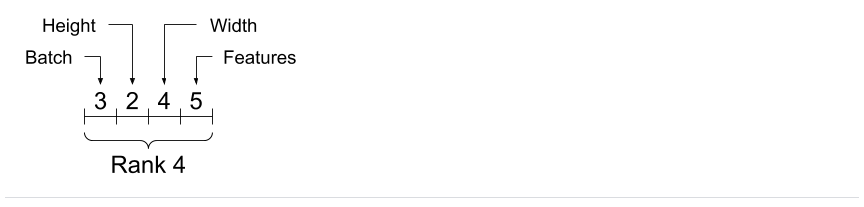

텐서플로우에서 SGD = mini batch gradient descent

## Indexing

### Single-axis indexing

TensorFlow follows standard Python indexing rules, similar to [indexing a list or a string in Python](https://docs.python.org/3/tutorial/introduction.html#strings){:.external}, and the basic rules for NumPy indexing.

* indexes start at `0`
* negative indices count backwards from the end
* colons, `:`, are used for slices: `start:stop:step`


In [ ]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


Indexing with a scalar removes the axis:</br>
스칼라를 사용하여 인덱싱하면 축이 제거됩니다:

In [28]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 2.0
Second: 3.0
Last: 4.0


Indexing with a `:` slice keeps the axis:</br>
슬라이스를 사용하여 인덱싱하면 축이 유지됩니다:

In [29]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [2. 3. 4.]
Before 4: [2. 3. 4.]
From 4 to the end: []
From 2, before 7: [4.]
Every other item: [2. 4.]
Reversed: [4. 3. 2.]


### Multi-axis indexing

Higher rank tensors are indexed by passing multiple indices.

The exact same rules as in the single-axis case apply to each axis independently.

더 높은 순위의 텐서는 여러 인덱스를 전달하여 인덱싱됩니다.

단일 축의 경우에서와 정확히 같은 규칙이 각 축에 독립적으로 적용됩니다.

In [ ]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


Passing an integer for each index, the result is a scalar.

In [ ]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


You can index using any combination of integers and slices:

In [ ]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Here is an example with a 3-axis tensor:

In [ ]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [ ]:
print(rank_3_tensor[:, :, 2])

tf.Tensor(
[[ 2  7]
 [12 17]
 [22 27]], shape=(3, 2), dtype=int32)


In [ ]:
print(rank_3_tensor[:, :, ])

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


<table>
<tr>
<th colspan=2>Selecting the last feature across all locations in each example in the batch </th>
</tr>
</table>

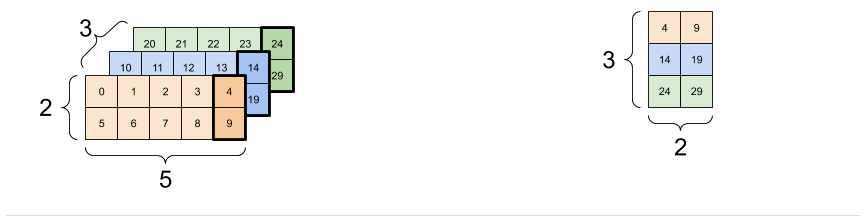

In [ ]:
print(rank_3_tensor[:, :, -1])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


Read the [tensor slicing guide](https://tensorflow.org/guide/tensor_slicing) to learn how you can apply indexing to manipulate individual elements in your tensors.

## Manipulating Shapes

Reshaping a tensor is of great utility. 


In [ ]:
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [ ]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The `tf.reshape` operation is fast and cheap as the underlying data does not need to be duplicated.

In [ ]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])

In [ ]:
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

In [ ]:
print(rank_3_tensor, "\n")
print(rank_3_tensor[0][0][0], "\n")
print(rank_3_tensor[0][0][1], "\n")
print(rank_3_tensor[0][0][2], "\n")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32) 

tf.Tensor(0, shape=(), dtype=int32) 

tf.Tensor(1, shape=(), dtype=int32) 

tf.Tensor(2, shape=(), dtype=int32) 



If you flatten a tensor you can see what order it is laid out in memory.

In [ ]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


In [ ]:
print(tf.reshape(rank_3_tensor, -1))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Typically the only reasonable use of `tf.reshape` is to combine or split adjacent axes (or add/remove `1`s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [ ]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


<table>
<th colspan=3>
Some good reshapes.
</th>
</table>


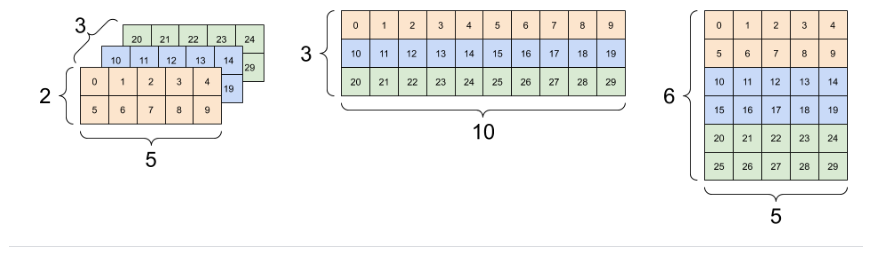

Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in `tf.reshape` does not work; you need `tf.transpose` for that. 


In [ ]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


<table>
<th colspan=3>
Some bad reshapes.
</th>
</table>

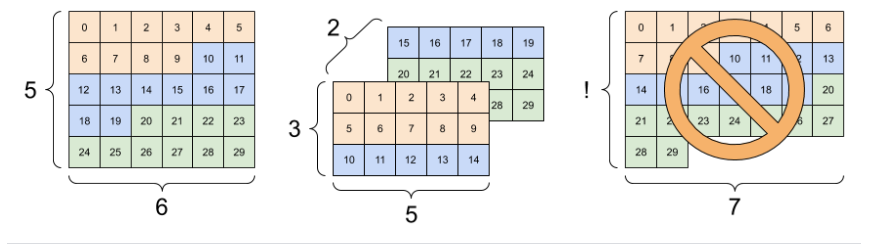

You may run across not-fully-specified shapes. Either the shape contains a `None` (an axis-length is unknown) or the whole shape is `None` (the rank of the tensor is unknown).

Except for [tf.RaggedTensor](#ragged_tensors), such shapes will only occur in the context of TensorFlow's symbolic, graph-building  APIs:

* [tf.function](function.ipynb) 
* The [keras functional API](https://www.tensorflow.org/guide/keras/functional).


## More on `DTypes`

To inspect a `tf.Tensor`'s data type use the `Tensor.dtype` property.

When creating a `tf.Tensor` from a Python object you may optionally specify the datatype.

If you don't, TensorFlow chooses a datatype that can represent your data. TensorFlow converts Python integers to `tf.int32` and Python floating point numbers to `tf.float32`. Otherwise TensorFlow uses the same rules NumPy uses when converting to arrays.

You can cast from type to type.

In [ ]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## Broadcasting

Broadcasting is a concept borrowed from the [equivalent feature in NumPy](https://numpy.org/doc/stable/user/basics.broadcasting.html){:.external}.  In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar.  In that case, the scalar is broadcast to be the same shape as the other argument. 

In [ ]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Likewise, axes with length 1 can be stretched out to match the other arguments.  Both arguments can be stretched in the same computation.

In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is `[4]`.

In [ ]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


<table>
<tr>
  <th>A broadcasted add: a <code>[3, 1]</code> times a <code>[1, 4]</code> gives a <code>[3,4]</code> </th>
</tr>
</table>


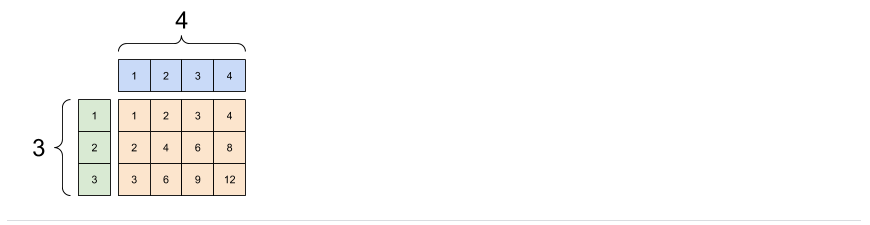

Here is the same operation without broadcasting:

In [ ]:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


Most of the time, broadcasting is both time and space efficient, as the broadcast operation never materializes the expanded tensors in memory.  

You see what broadcasting looks like using `tf.broadcast_to`.

In [ ]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


Unlike a mathematical op, for example, `broadcast_to` does nothing special to save memory.  Here, you are materializing the tensor.

It can get even more complicated.  [This section](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html){:.external} of Jake VanderPlas's book _Python Data Science Handbook_ shows more broadcasting tricks (again in NumPy).

## tf.convert_to_tensor

Most ops, like `tf.matmul` and `tf.reshape` take arguments of class `tf.Tensor`.  However, you'll notice in the above case, Python objects shaped like tensors are accepted.

Most, but not all, ops call `convert_to_tensor` on non-tensor arguments.  There is a registry of conversions, and most object classes like NumPy's `ndarray`, `TensorShape`, Python lists, and `tf.Variable` will all convert automatically.

See `tf.register_tensor_conversion_function` for more details, and if you have your own type you'd like to automatically convert to a tensor.

## Ragged Tensors

A tensor with variable numbers of elements along some axis is called "ragged". Use `tf.ragged.RaggedTensor` for ragged data.

For example, This cannot be represented as a regular tensor:

<table>
<tr>
  <th>A `tf.RaggedTensor`, shape: <code>[4, None]</code></th>
</tr>
</table>

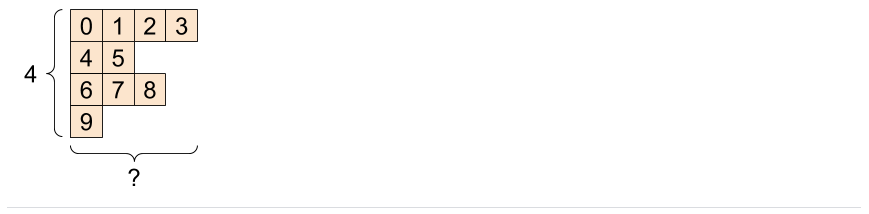

In [ ]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [ ]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


Instead create a `tf.RaggedTensor` using `tf.ragged.constant`:

In [ ]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


The shape of a `tf.RaggedTensor` will contain some axes with unknown lengths:

In [ ]:
print(ragged_tensor.shape)

(4, None)


## String tensors

`tf.string` is a `dtype`, which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the axes of the tensor. See `tf.strings` for functions to manipulate them.

Here is a scalar string tensor:

In [ ]:
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


And a vector of strings:

<table>
<tr>
  <th>A vector of strings, shape: <code>[3,]</code></th>
</tr>
<tr>
  <td>
<img src="images/tensor/strings.png" alt="The string length is not one of the tensor's axes.">
  </td>
</tr>
</table>

In [ ]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In the above printout the `b` prefix indicates that `tf.string` dtype is not a unicode string, but a byte-string. See the [Unicode Tutorial](https://www.tensorflow.org/tutorials/load_data/unicode) for more about working with unicode text in TensorFlow.

If you pass unicode characters they are utf-8 encoded.

In [ ]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

Some basic functions with strings can be found in `tf.strings`, including `tf.strings.split`.

In [ ]:
# You can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [ ]:
# ...but it turns into a `RaggedTensor` if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


<table>
<tr>
  <th>Three strings split, shape: <code>[3, None]</code></th>
</tr>
</table>

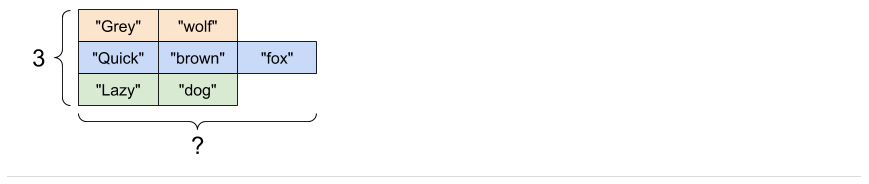

And `tf.string.to_number`:

In [ ]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


Although you can't use `tf.cast` to turn a string tensor into numbers, you can convert it into bytes, and then into numbers.

In [ ]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [ ]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


The `tf.string` dtype is used for all raw bytes data in TensorFlow. The `tf.io` module contains functions for converting data to and from bytes, including decoding images and parsing csv.

## Sparse tensors

Sometimes, your data is sparse, like a very wide embedding space.  TensorFlow supports `tf.sparse.SparseTensor` and related operations to store sparse data efficiently.

<table>
<tr>
  <th>A `tf.SparseTensor`, shape: <code>[3, 4]</code></th>
</tr>
</table>

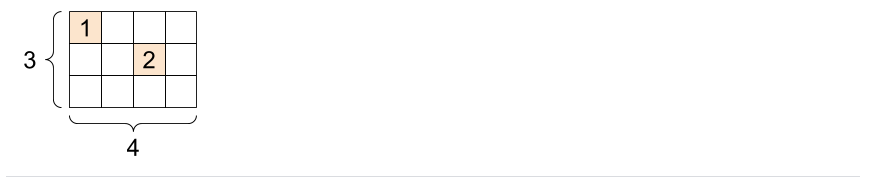

In [ ]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)
